Osnabrück University - Computer Vision (Winter Term 2018/19) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 03: Morphological Operations¶

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, November 25, 2018**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (complex numbers) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a *complex number*, what is the *complex plane*, how are complex numbers usually denoted?

YOUR ANSWER HERE

**b)** What is the *real* and the *imaginary* part of a complex number? What is the *absolute value* of a complex number? What is the *complex conjugate*?

YOUR ANSWER HERE

**c)** What are polar coordinates? What are their advantages? Can you convert between cartesian and polar coordinates? Can you write down $i=\sqrt{-1}$ in polar coordinates? What about $\sqrt{i}$?

YOUR ANSWER HERE

**d)** Python, and also numpy, support calculations with complex numbers. Consult the documentation to find out details. Notice that $i$ is substituted by $j$ in Python.

In [ ]:
# YOUR CODE HERE

## Assignment 1: Properties of morphological operators [5 Points]

This exercise will elaborate on the basic morphological operators of *erosion* and *dilation* (cf. CV-05 slides 4-14).

### a) Duality

Proof that *erosion* and *dilation* are *dual* operators, i.e.

$$ g^{\ast}\oplus S = (g\ominus S)^{\ast}\qquad\text{and}\qquad
g^{\ast}\ominus S = (g\oplus S)^{\ast}$$

here $g^{\ast}$ denotes the inverted binary image, i.e. $g^{\ast}(x,y) = 1 - g(x,y) = \neg g(x,y)$, i.e. 1-pixel become 0 and 0-pixel become 1.

YOUR ANSWER HERE

### b) Superposition

As *erosion* and *dilation* have been introduced for binary images, the notion of *linearity* is not really appropriate here. However, some weaker version, called *superposition* can be defined: instead of forming linear combination, one takes the logical disjunction:

$$(g_1\lor g_2)(x,y) := g_1(x,y)\lor g_2(x,y)$$

Check for both operations if *erosion* and *dilation* are "compatible" with superposition, i.e. if first *eroding* (or *dilating*) two images and superposing the result is the same as first superposing the images and then *eroding* (or *dilating*) the result.

### Dilation

Since new pixels (value = 1) are only added and no existing ones are removed, dilation is compatible with superposition (although it seems unneccessary).

$$\begin{align*}
\text{Dilation} &= \bigvee_{i\in[-m,m]}\bigvee_{j\in[-n,n]} S(i+m,j+n) \land g(x+i,y+j)\\
\text{Dilation}_S &= \bigvee_{i\in[-m,m]} g(x+i,y+j) \lor\bigvee_{j\in[-n,n]} S(i+m,j+n) \land g(x+i,y+j)
\end{align*}$$

**Truth Table**

| g(x,y) | S(x,y) | Dilation | $\text{Dilation}_S$ |
| ------ | ------ | -------- | ------------------- |
| 0 | 0 | 0 | 0 |
| 1 | 0 | 1 | 1 |
| 0 | 1 | 1 | 1 |
| 1 | 1 | 1 | 1 |

### Erosion

Since erosion *removes* pixels (value = 0) that existed previously, superposition does not result in the same image as ersosion by itself, because these discarded pixels remain by applying the logical OR.

$$\begin{align*}
\text{Erosion} &= \bigwedge_{i\in[-m,m]}\bigwedge_{j\in[-n,n]} S(i+m,j+n) \implies g(x+i,y+j)\\
\text{Erosion}_S &= \bigwedge_{i\in[-m,m]} g(x+i,y+j) \lor\bigwedge_{j\in[-n,n]} (S(i+m,j+n) \implies g(x+i,y+j))
\end{align*}$$

**Truth Table**

| g(x,y) | S(x,y) | Erosion | $\text{Erosion}_S$ |
| ------ | ------ | -------- | ------------------- |
| 0 | 0 | 1 | 1 |
| 1 | 0 | 1 | 1 |
| 0 | 1 | 0 | 0 |
| 1 | 1 | 1 | 1 |

In [ ]:
# YOUR CODE HERE

### c) Chaining

Show that *dilation* and *erosion* have the following properties: given two structering elements $S_1$ and $S_2$, it holds

\begin{align}
  (g\oplus S_1)\oplus S_2 & & = & g\oplus (S_1\oplus S_2) && = (g\oplus S_2)\oplus S_1 \\
  (g\ominus S_1)\ominus S_2 & & = & g\ominus (S_1\oplus S_2) && = (g\ominus S_2)\ominus S_1 \\  
\end{align}

What are the practical consequences?

YOUR ANSWER HERE

## Assignment 2: Application [5 Points]


### a) Boundary extraction

Extract the boundary of a shape using opening or closing. You may use `binary_dilation` or `binary_erosion` from `scipy.ndimage.morphology`. Can you achieve a thicker boundary?

<Figure size 432x288 with 0 Axes>

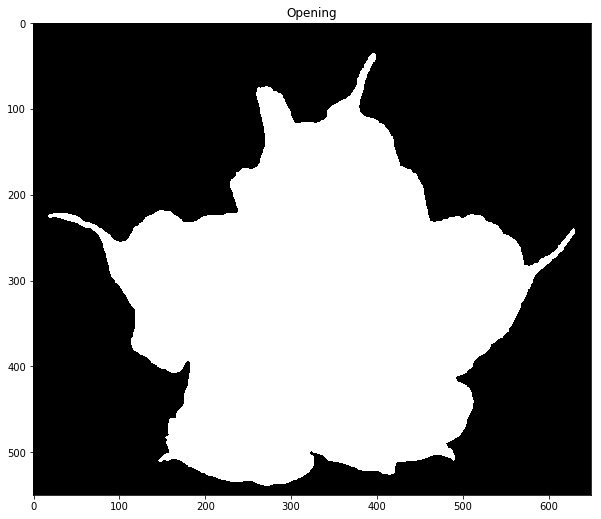

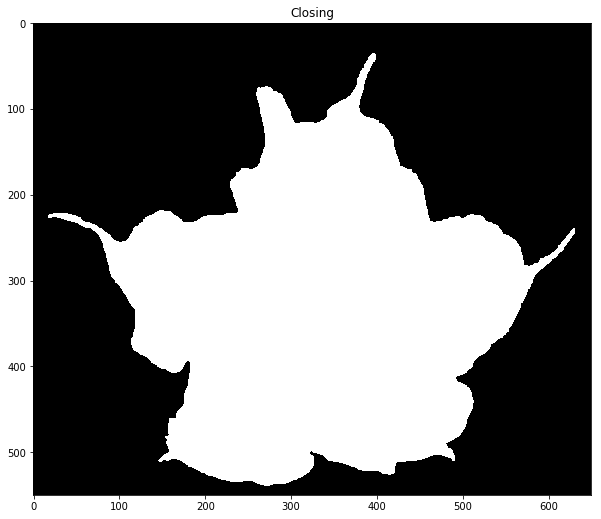

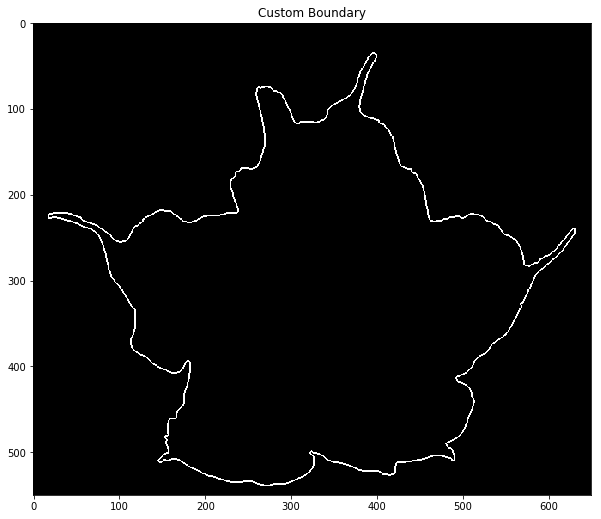

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
import scipy.ndimage.morphology as morph

def opening(img):
    erosion = morph.binary_erosion(img)
    return morph.binary_dilation(erosion)

def closing(img):
    dilation = morph.binary_dilation(img)
    return morph.binary_erosion(dilation)

def my_boundary(img):
    """
    Compute boundary of binary image.

    Parameters
    ----------
    img : ndarray of bools
        A binary image.
        
    Returns
    -------
    boundary : ndarray of bools
        The boundary as a binary image.
    """
    
    erosion = morph.binary_erosion(img)
    dilation = morph.binary_dilation(img)
    
    boundaryA = np.logical_xor(erosion, img)
    boundaryB = np.logical_xor(dilation, img)
    # Use both to prevent holes
    return np.logical_or(boundaryA, boundaryB)
    
img = plt.imread("images/engelstrompete.png") > 0

plt.gray()
plt.figure(figsize=(10,10))
plt.title("Opening")
plt.imshow(opening(img))
plt.show()

plt.figure(figsize=(10,10))
plt.title("Closing")
plt.imshow(closing(img))
plt.show()

plt.figure(figsize=(10,10))
plt.title("Custom Boundary")
plt.imshow(my_boundary(img))
plt.show()

### b)  Distance transform

Implement distance transform according to the ideas of (CV-05 slides 34ff).  Discuss the effect of different structuring elements.

D:\06_Programme\Anaconda\envs\cv\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
D:\06_Programme\Anaconda\envs\cv\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


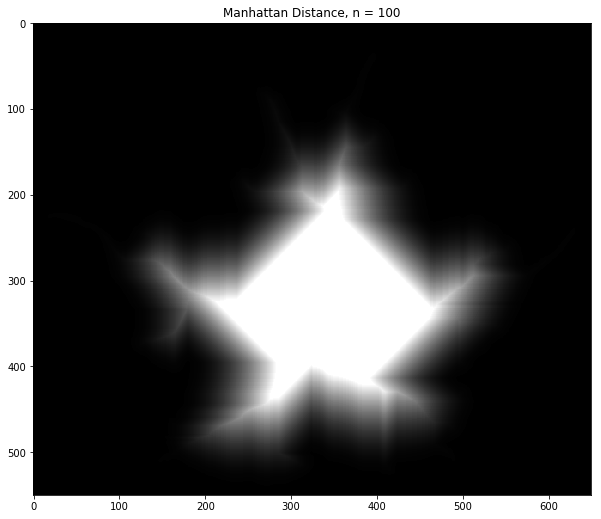

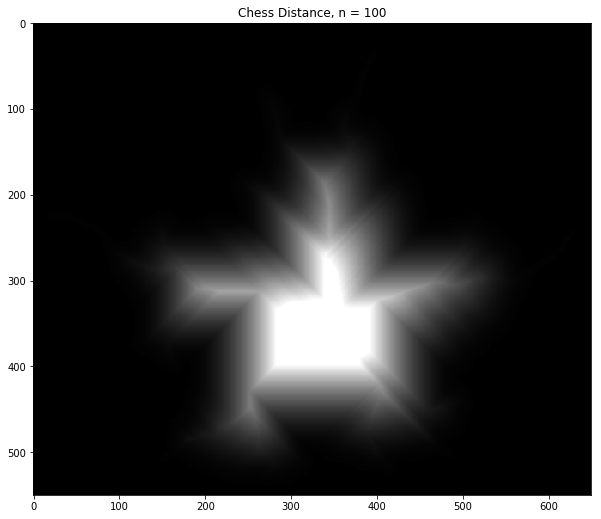

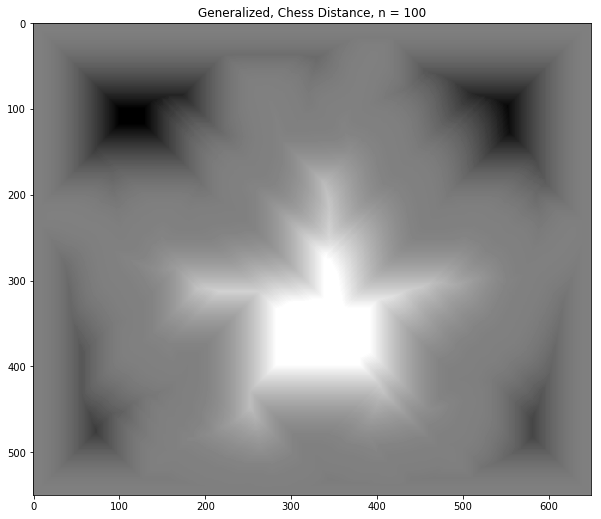

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import morphology as morph, generate_binary_structure

def generalized_distance_transform(img,struct,n=100):
    inverted = np.logical_not(img)
    d1 = distance_transform(img,struct,n)
    d2 = distance_transform(inverted,struct,n)
    result = d1-d2
    return (result / result.max()) * 255

def distance_transform(img,struct,n=100):
    """
    Distance transform of binary image.

    Parameters
    ----------
    img : ndarray of bools
        A binary image.
        
    Returns
    -------
    dt : ndarray of ints
        The distance transform of the input image.
    """
    inside = img
    dt = np.zeros(img.shape,np.int32)
    for i in range(n):
        tmp = morph.binary_erosion(inside,structure=struct)
        dt = dt +  i * np.where(tmp > 0, inside/tmp, 0)
        inside = tmp
    return dt

manhattan = generate_binary_structure(2, 1)
chess = generate_binary_structure(2, 2)

img = plt.imread("images/engelstrompete.png") > 0
plt.figure(figsize=(10,10))
plt.title("Manhattan Distance, n = 100")
plt.imshow(distance_transform(img,manhattan) + 50 * img)
plt.show()

plt.figure(figsize=(10,10))
plt.title("Chess Distance, n = 100")
plt.imshow(distance_transform(img,chess) + 50 * img)
plt.show()

plt.figure(figsize=(10,10))
plt.title("Generalized, Chess Distance, n = 100")
plt.imshow(generalized_distance_transform(img,chess))
plt.show()

Different structuring elements result in different distance metrics.

### c) Morphing

Write a function `my_morph` that implements morphing according to (CV-05 slide 41). You may use your function `my_distance_transform` from part b), or the function `distance_transform_edt` from `scipy.ndimage.morphology`.

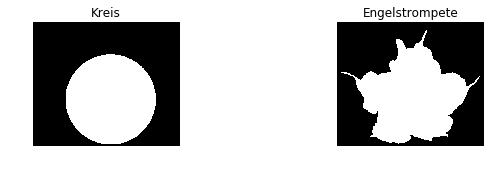

<Figure size 432x288 with 0 Axes>

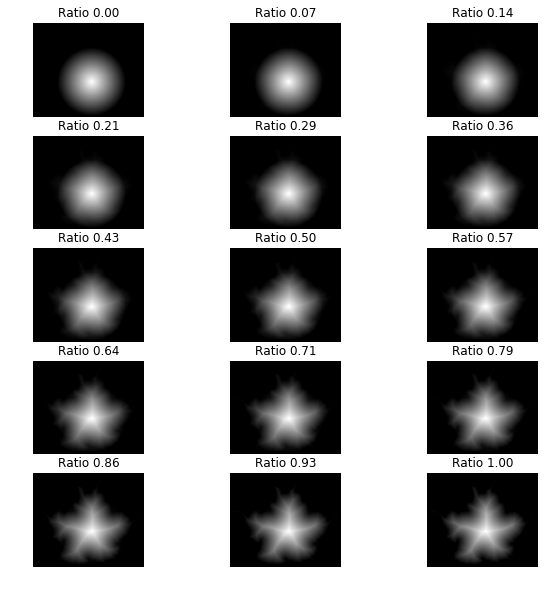

In [57]:
### %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.morphology as morph

def my_morph(A,B,ratio):
    """
    Morphing from binary image A to image B.

    Parameters
    ----------
    A : ndarray of bools
        A binary image (start).
    B : ndarray of bools
        A binary image (target), same shape as A.
    ratio : float from 0.0 to 1.0
        The ratio of image A and image B.
        0.0=only image A, 1.0=only image B.
        
    Returns
    -------
    morph : ndarray of bools
        A binary intermediate image between A and B.
    """

    da = morph.distance_transform_edt(A)
    db = morph.distance_transform_edt(B)
    
    return (ratio * db + (1-ratio) * da)
    # Binarized
    # return (ratio * db + (1-ratio) * da) > 0.5

img1 = plt.imread("images/kreis.png") > 0
img2 = plt.imread("images/engelstrompete.png") > 0

plt.figure(figsize=(10,5))
plt.subplot(2, 2, 1)
plt.title("Kreis")
plt.imshow(img1)
plt.axis('off')
plt.subplot(2, 2, 2)
plt.title("Engelstrompete")
plt.imshow(img2)
plt.axis('off')
plt.show()

num = 15

plt.gray()
plt.figure(figsize=(10,10))
for i, ratio in enumerate(np.linspace(0, 1, num), 1):
    plt.subplot(num/3, 3, i)
    plt.title("Ratio {0:.2f}".format(ratio))
    plt.imshow(my_morph(img1, img2, ratio))
    plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


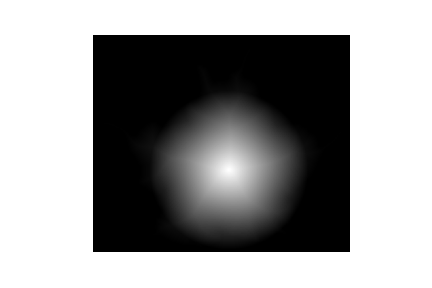

In [58]:
# If you want to see your morph as an animation, run this cell. 
# Close the output (press the blue "Stop interaction" button) once you are done!

# Due to some matplotlib problem you may have to restart your kernel!
%matplotlib notebook
%matplotlib notebook
import matplotlib.animation as animation
fig = plt.figure()

ims = []
for i, ratio in enumerate(np.linspace(0, 1, 24), 1):
    plt.axis('off')
    im = plt.imshow(my_morph(img1, img2, ratio), cmap='gray', animated=True)
    ims.append([im])  
    
ani = animation.ArtistAnimation(fig, ims + list(reversed(ims)), interval=100, blit=True)

plt.show()

## Assignment 3: Implementation: Skeletonization [5 Points]

### a) Skeletonization with hit-or-miss

Explain in your own words, how the hit-or-miss operator can be used for skeletonization (cf CV-05 slide 49).  

Skeletonization aims to find a compact and meaningful representation of the shape of a segment or image. The skeleton is identical to the medial axis of a shape (see figure below). The hit-ot-miss operator can be used to iterativel remove boundary pixels from all directions (horizontal, vertical and diagonal) until they *meet*, at which point the medial axis/skeleton is found.

![Medial Axis][bunny]

[bunny]: https://ars.els-cdn.com/content/image/1-s2.0-S1524070314000149-gr2.jpg

### b) Implementation of skeletonization

Now use this method to implement your own skeletonization function. It is ok to use
`scipy.ndimage.morphology.binary_hit_or_miss` here (but of course *not* `skimage.morphology.skeletonize` or similar functions). Compare your result with (CV-05 slide 50). Note that computing the skeleton using this method may take some time ...

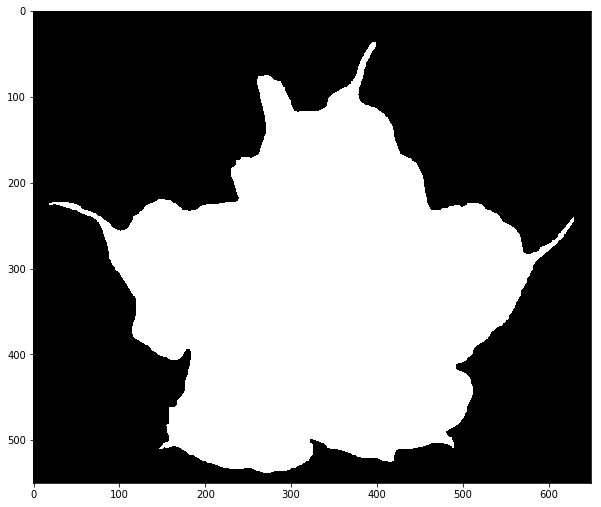

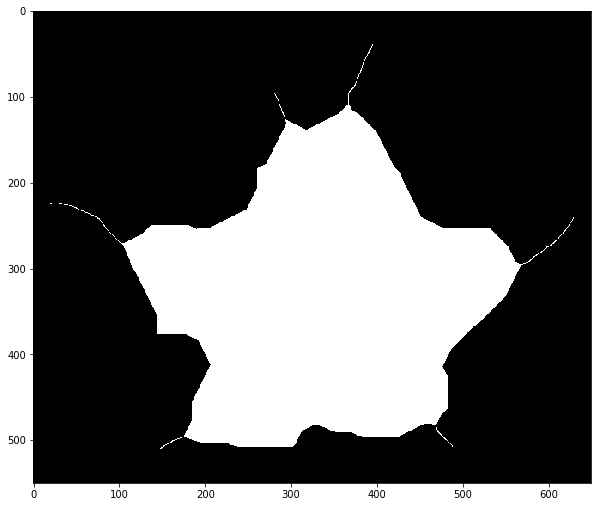

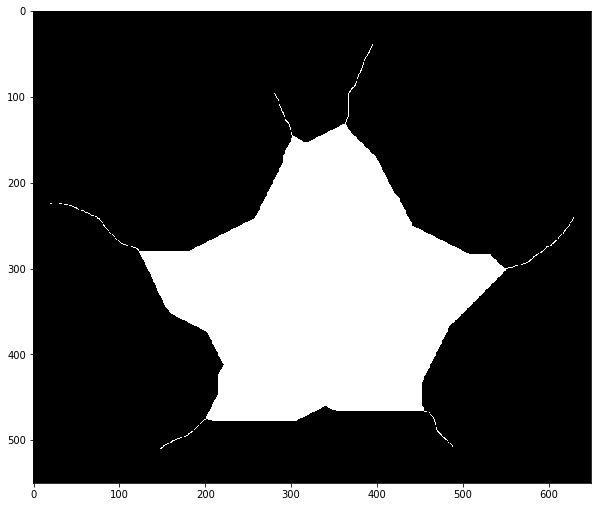

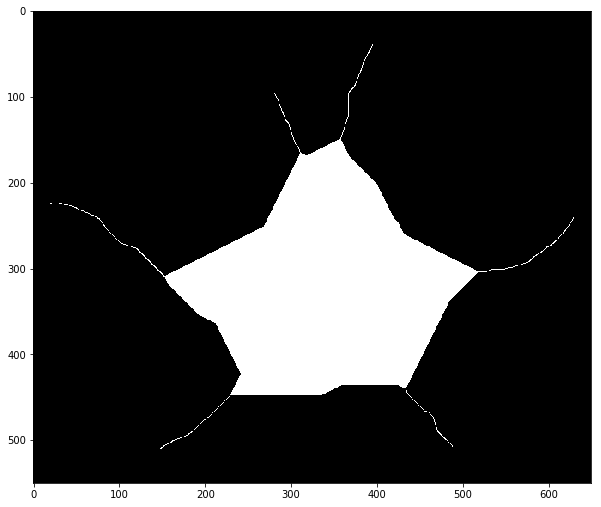

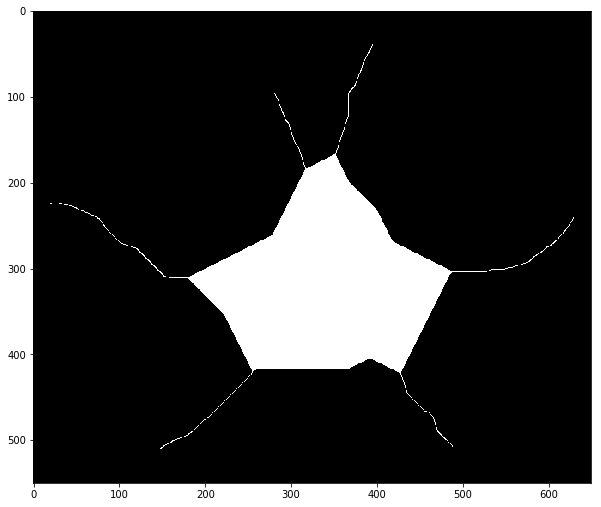

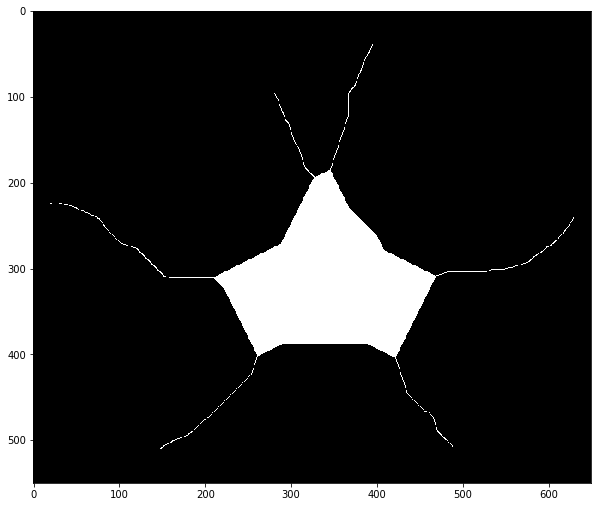

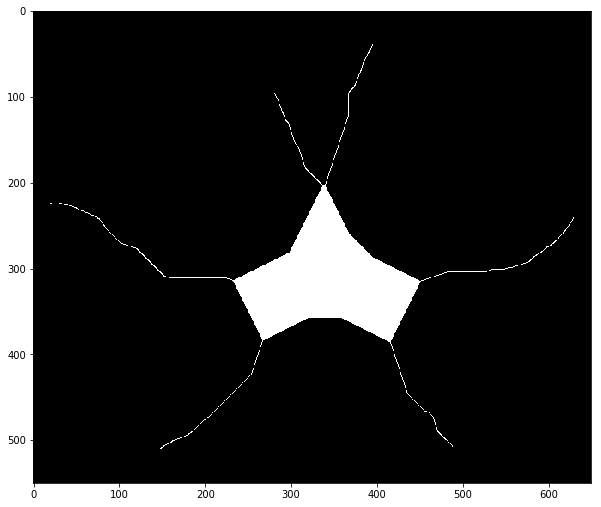

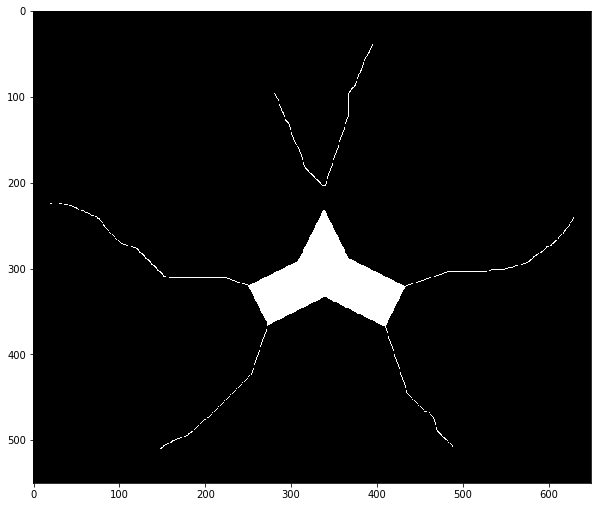

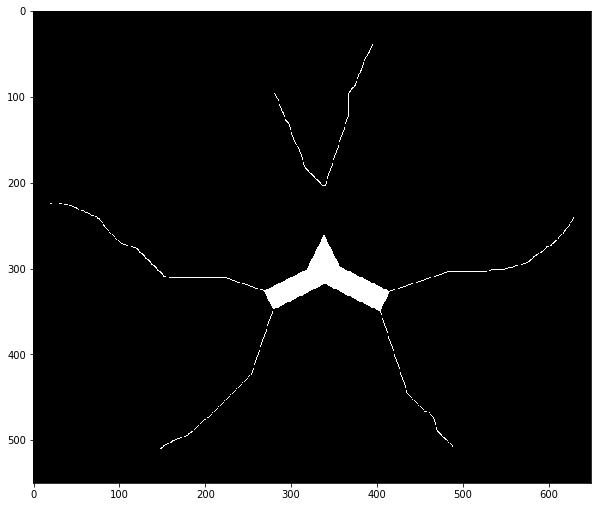

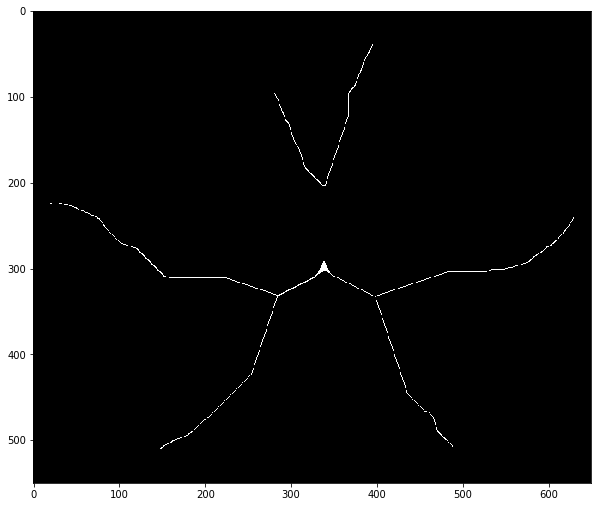

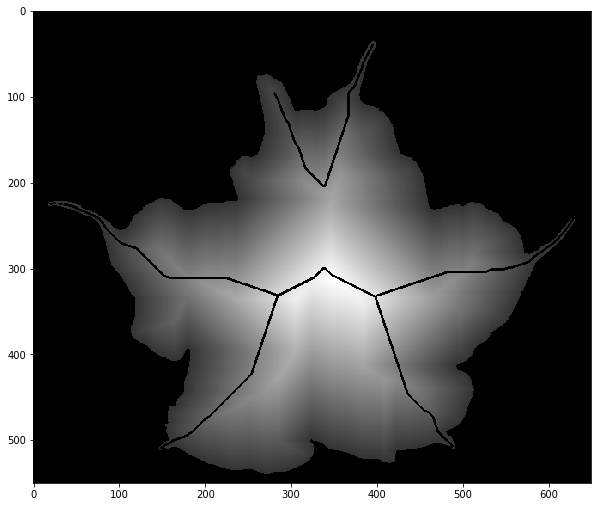

In [173]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.morphology as morph

hom_r1 = np.array([[0,0,1],[0,1,1],[0,0,1]])
hom_r2 = np.array([[1,0,0],[1,0,0],[1,0,0]])

hom_l1 = np.array([[1,0,0],[1,1,0],[1,0,0]])
hom_l2 = np.array([[0,0,1],[0,0,1],[0,0,1]])

hom_u1 = np.array([[1,1,1],[0,1,0],[0,0,0]])
hom_u2 = np.array([[0,0,0],[0,0,0],[1,1,1]])

hom_d1 = np.array([[0,0,0],[0,1,0],[1,1,1]])
hom_d2 = np.array([[1,1,1],[0,0,0],[0,0,0]])

hom_ur1 = np.array([[0,1,1],[0,1,1],[0,0,0]])
hom_ur2 = np.array([[0,0,0],[1,0,0],[1,1,0]])

hom_dr1 = np.array([[0,0,0],[0,1,1],[0,1,1]])
hom_dr2 = np.array([[1,1,0],[1,0,0],[0,0,0]])

hom_ul1 = np.array([[1,1,0],[1,1,0],[0,0,0]])
hom_ul2 = np.array([[0,0,0],[0,0,1],[0,1,1]])

hom_dl1 = np.array([[0,0,0],[1,1,0],[1,1,0]])
hom_dl2 = np.array([[0,1,1],[0,0,1],[0,0,0]])

hom_ops = np.array([
            hom_r1, hom_r2, hom_l1, hom_l2,
            hom_u1, hom_u2, hom_d1, hom_d2,
            hom_ur1, hom_ur2, hom_dr1, hom_dr2,
            hom_ul1, hom_ul2, hom_dl1, hom_dl2])

def my_skeletonize(img):
    """
    Compute the skeleton of a binary image using hit_or_miss operator.
    
    Parameters
    ----------
    img : ndarray of bools
        Binary image to be skeletonized.
    
    Returns
    -------
    skeleton : ndarray of bools
        The skeleton of the input image.
    """
    result = img
    diff = 1
    count = 0
    debug = True
    
    while diff > 0:
        tmp = morph.binary_hit_or_miss(result, hom_ops[0], hom_ops[1])
        for i in range(1, int(len(hom_ops)/2)):
            tmp = np.logical_or(tmp,morph.binary_hit_or_miss(result, hom_ops[2*i], hom_ops[2*i+1]))
        diff = np.sum(tmp)
        result = np.logical_xor(result,tmp)
        if debug and count % 30 == 0:
            plt.figure(figsize=(10,10))
            plt.gray()
            plt.imshow(result)
            plt.show()
        count += 1
    
    return result

img = plt.imread("images/engelstrompete.png") > 0
skel = my_skeletonize(img)
result = morph.distance_transform_cdt(img, metric='taxicab') + (50 * img)
result[morph.binary_dilation(skel)] = 0
plt.figure(figsize=(10,10))
plt.gray()
plt.imshow(result)
plt.show()

## Assignment 4: Custom Structuring Element [5 points]

Landsat 7 is a satelite mission for acquisition of satellite imagery of Earth. Unfortunately the Scan Line Corrector failed, resulting in black stripes on the aquired images. More information: https://landsat.usgs.gov/slc-products-background


### a) A first fix

A rather crude fix is to apply a custom structuring element for dilation and erosion (see CV-05, 24ff). Complement the code below (in part (b)) in the following way:
* Rotate the image such that the gaps are horizontal.
* Dilate the rotated image with a vertical structuring element. I.e. take the maximum of an area of size $7 \times1$ and assign it to the center pixel. Repeat for all pixels.
* Erode the dilated image.
* Rotate the result back.

Remark: this exercise applies morphological operator to color images. This extends the idea of generalizing morphological operators to gray value images (CV-05, slide 52).  

### b) Improving the solution
You may get better results by thresholding and applying the morphological operations only to pixels below a threshold, i.e. gap pixels. Compliment your solution from a). 

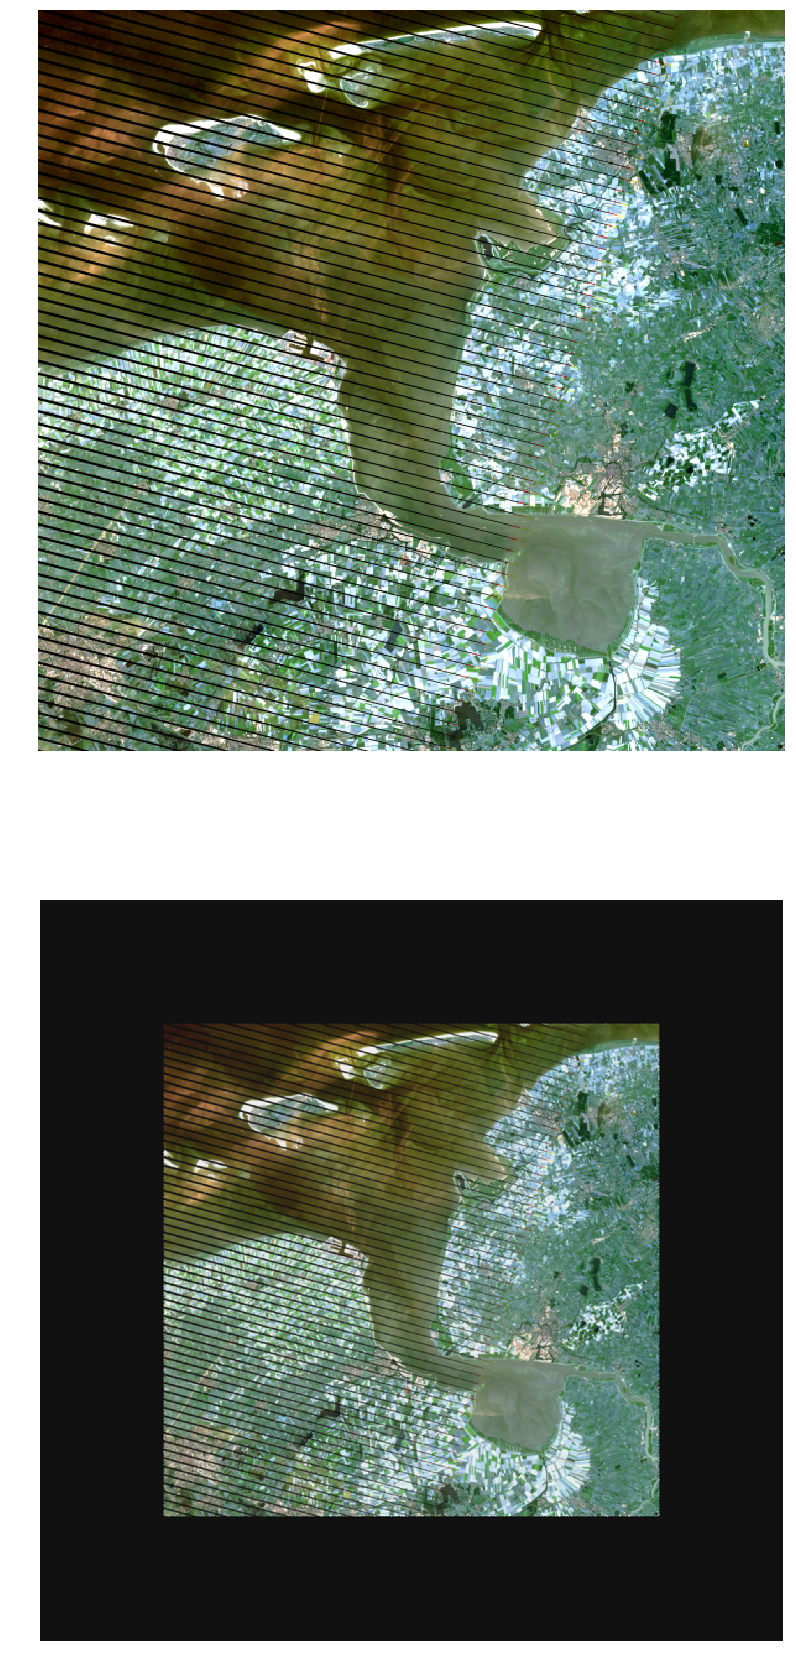

In [136]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.morphology as morph
import scipy.ndimage as ndimg
from skimage.transform import rescale as rescale

angle = 15
thresh = 300
struc_elem = np.ones((7,1), dtype=np.bool)

img = plt.imread("images/landsat_stack2.png")
img2 = img.copy()
img3 = img.copy()

# YOUR CODE HERE
img3 = ndimg.interpolation.rotate(img3, angle)
#img3 = morph.grey_dilation(img3, structure=struc_elem)
#img3 = morph.grey_erosion(img3)
img3 = ndimg.interpolation.rotate(img3, -angle)

img = (img - np.min(img))/np.ptp(img)
img3 = (img3 - np.min(img3))/np.ptp(img3)

plt.figure(figsize=(15,30))
plt.subplot(2,1,1); plt.imshow(img); plt.axis('off')
plt.subplot(2,1,2); plt.imshow(img3); plt.axis('off')
plt.show()


### c) Bonus
Can you think of other ways to add the missing data? 


YOUR ANSWER HERE